In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [76]:
df = pd.read_csv("diabetes.csv")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [77]:
def sigmoid_function(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

#checking sigmoid
#If sigmoid function is correct, when we give "0" to the fuction result have to be 0.5.
sigmoid_function(0)

0.5

In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
features = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values
features,labels

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.3)
x_train,x_test,y_train,y_test

(array([[  4.   , 137.   ,  84.   , ...,  31.2  ,   0.252,  30.   ],
        [  4.   ,  85.   ,  58.   , ...,  27.8  ,   0.306,  28.   ],
        [  7.   , 125.   ,  86.   , ...,  37.6  ,   0.304,  51.   ],
        ...,
        [  4.   , 125.   ,  80.   , ...,  32.3  ,   0.536,  27.   ],
        [ 10.   , 111.   ,  70.   , ...,  27.5  ,   0.141,  40.   ],
        [  1.   ,  84.   ,  64.   , ...,  36.9  ,   0.471,  28.   ]]),
 array([[ 10.   ,  92.   ,  62.   , ...,  25.9  ,   0.167,  31.   ],
        [  9.   , 152.   ,  78.   , ...,  34.2  ,   0.893,  33.   ],
        [  1.   , 130.   ,  60.   , ...,  28.6  ,   0.692,  21.   ],
        ...,
        [  1.   ,  88.   ,  78.   , ...,  32.   ,   0.365,  29.   ],
        [ 13.   , 106.   ,  70.   , ...,  34.2  ,   0.251,  52.   ],
        [  6.   , 104.   ,  74.   , ...,  29.9  ,   0.722,  41.   ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 

In [62]:
x_train.shape, x_test.shape

((537, 8), (231, 8))

In [63]:
y_train.shape,y_test.shape

((537,), (231,))

In [64]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
KNeighborsClassifier()

KNeighborsClassifier()

In [65]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [66]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [67]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       173
           1       0.48      0.67      0.56        58

    accuracy                           0.74       231
   macro avg       0.68      0.71      0.69       231
weighted avg       0.77      0.74      0.75       231



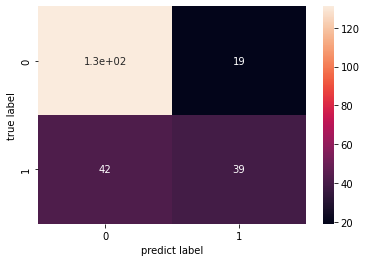

In [70]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
sb.heatmap(conf_mat,annot=True)
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()


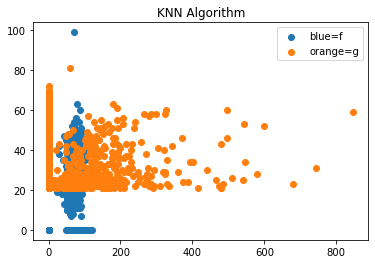

In [80]:
x_val = df['BloodPressure']
y_val = df['SkinThickness']
x1_val = df['Insulin']
y1_val = df['Age']
plt.scatter(x_val,y_val,label='blue=f')
plt.scatter(x1_val,y1_val,label='orange=g')
plt.title('KNN Algorithm')
plt.legend()
plt.show()